In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from base_line_DNN import CNN_LSTM as network
from base_line_DNN import ProcessData
from base_line_LR import LR
from datetime import datetime

def get_timestamp():
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%d-%b-%Y_%H_%M_%S")
    return timestampStr

Reading Emoticons ...
Reading Slangs ...


In [2]:
df_en = pd.read_csv('../data/dataset_en.csv')
df_en["class"] = df_en["class"].astype(int)
df_en = df_en.dropna() # drop any rotokenizer_testws with nans
df_en.drop(df_en.loc[df_en['text_id'] == 'text_id'].index,inplace=True)
df_en.drop(df_en.loc[df_en['class'] == 'HS'].index,inplace=True)
df_en['text_len'] = df_en.apply(lambda x: len(x.text.split()), axis=1)
df_en = df_en[df_en['text_len']<200]

In [ ]:
data = ProcessData(df_en, lang=parameters['lang'])

In [ ]:
print(data.max_seq_len, data.vocab_size, data.classes)

In [3]:
parameters={'lang':'en',
       'seed':30,
       'epochs':50, 
       'batch_size':30, 
       'optimiser':'sgd', 
       'lr_rate':0.001, 
       'drop_out':0.2, 
       'hidden_size':64,
        'val_split':0.2
      }

In [ ]:
net = network(param=parameters)
model = net.get_model_2(classes=len(data.classes), 
                        vocabulary_size=data.vocab_size, 
                        input_length=data.max_seq_len, 
                        param=parameters)

In [7]:
tmp = get_timestamp()
model_path = '../model/'+tmp+'_en_weights.best.hdf5'
hist = net.train(data.X_train, data.y_train, model, model_path, data.class_weight)

Train on 36265 samples, validate on 4030 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
36120/36265 [============================>.] - ETA: 0s - loss: 1.0234 - acc: 0.4903
Epoch 00001: val_acc improved from -inf to 0.57246, saving model to ../model/en_weights.best.hdf5
36265/36265 [==============================] - 21s 584us/sample - loss: 1.0230 - acc: 0.4906 - val_loss: 0.9356 - val_acc: 0.5725
Epoch 2/50
36240/36265 [============================>.] - ETA: 0s - loss: 0.8861 - acc: 0.5935
Epoch 00002: val_acc improved from 0.57246 to 0.63449, saving model to ../model/en_weights.best.hdf5
36265/36265 [==============================] - 16s 445us/sample - loss: 0.8860 - acc: 0.5935 - val_loss: 0.8270 - val_acc: 0.6345
Epoch 3/50
36150/36265 [============================>.] - ETA: 0s - loss: 0.8186 - acc: 0.6362
Epoch 00003: val_acc improved from 0.63449 to 0.65285, saving model to ../model/en_weights.best.hdf5
36265/36265 [==============================] - 17s 461us/s

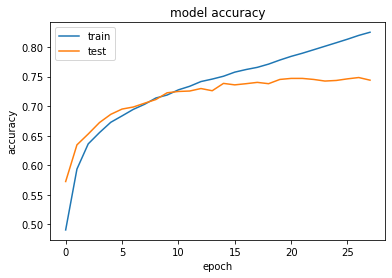

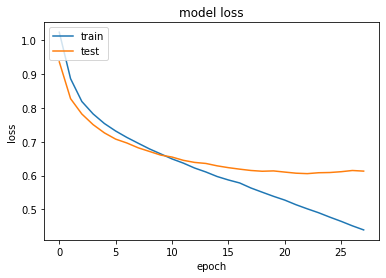

In [8]:
# hist.history.keys()
net.plot_taining_graphs(hist)

In [9]:
test_loss, test_acc = net.test(model,data.X_test, data.y_test)

print("Overall Accuracy:", test_acc)
print("Overall Loss:", test_loss)

10074/10074 [==============================] - 2s 158us/sample - loss: 0.8956 - acc: 0.6296
Overall Accuracy: 0.82964064
Overall Loss: 0.3956158276006109


In [10]:
y_pred = model.predict(data.X_test)

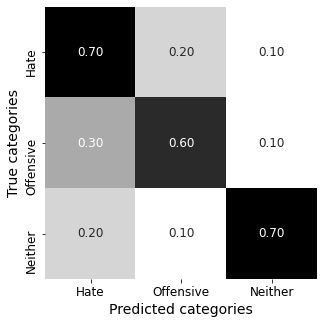

In [6]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(data.y_test, axis=1)
cls_obj = LR()
cls_obj.gen_confusion_matrix(y_test = y_test, y_pred = y_pred, classes = 3)

In [16]:
parameters['epochs']=len(hist.history['acc'])
parameters['test_acc']=test_acc
parameters['test_loss']=test_loss
parameters['timestamp']=tmp
df = pd.DataFrame([parameters])
df.to_csv('result.csv', mode='a', index=False)

## HI

In [2]:
df_hi = pd.read_csv('../data/dataset_hi.csv')
df_hi["class"] = df_hi["class"].astype(int)
df_hi = df_hi.dropna() # drop any rotokenizer_testws with nans
df_hi.drop(df_hi.loc[df_hi['text_id'] == 'text_id'].index,inplace=True)
df_hi.drop(df_hi.loc[df_hi['class'] == 'HS'].index,inplace=True)
df_hi['text_len'] = df_hi.apply(lambda x: len(x.text.split()), axis=1)
df_hi = df_hi[df_hi['text_len']<200]

In [3]:
data = ProcessData(df_hi, lang='hi')

> /homes/nv304/online-hate-speech-recog/src/base_line_DNN.py(249)clean_doc()
-> feat = fg.features(lang=self.lang)


(Pdb)  continue


Reading english - 1grams ...


100%|██████████| 9330/9330 [29:50<00:00,  5.21it/s]  


In [4]:
data.max_seq_len, data.vocab_size, data.classes

(104, 6082, array([0, 1]))

In [93]:
parameters={'lang':'hi',
       'seed':30,
       'epochs':20, 
       'batch_size':30, 
       'optimiser':'sgd', 
       'lr_rate':0.001, 
       'drop_out':0.1, 
       'hidden_size':32,
            'val_split':0.2
      }

In [94]:
net = network(param=parameters)
model = net.get_model_2(classes=len(data.classes), 
                        vocabulary_size=data.vocab_size, 
                        input_length=data.max_seq_len,
                        param=parameters)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 104, 100)     608200      input_10[0][0]                   
__________________________________________________________________________________________________
reshape_18 (Reshape)            (None, 104, 100, 1)  0           embedding_9[0][0]                
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 102, 1, 64)   19264       reshape_18[0][0]                 
__________________________________________________________________________________________________
conv2d_28 

In [95]:
tmp=get_timestamp()
model_path = '../model/'+tmp+'_hi_weights.best.hdf5'
hist = net.train(data.X_train, data.y_train, model, model_path, data.class_weight)

Train on 5971 samples, validate on 1493 samples
Epoch 1/20
5910/5971 [============================>.] - ETA: 0s - loss: 0.6995 - acc: 0.5320
Epoch 00001: val_acc improved from -inf to 0.48426, saving model to ../model/25-Aug-2020_18_25_09_hi_weights.best.hdf5
5971/5971 [==============================] - 22s 4ms/sample - loss: 0.6993 - acc: 0.5326 - val_loss: 0.6930 - val_acc: 0.4843
Epoch 2/20
5940/5971 [============================>.] - ETA: 0s - loss: 0.6877 - acc: 0.5537
Epoch 00002: val_acc improved from 0.48426 to 0.52244, saving model to ../model/25-Aug-2020_18_25_09_hi_weights.best.hdf5
5971/5971 [==============================] - 4s 586us/sample - loss: 0.6876 - acc: 0.5545 - val_loss: 0.6912 - val_acc: 0.5224
Epoch 3/20
5970/5971 [============================>.] - ETA: 0s - loss: 0.6819 - acc: 0.5812
Epoch 00003: val_acc improved from 0.52244 to 0.54856, saving model to ../model/25-Aug-2020_18_25_09_hi_weights.best.hdf5
5971/5971 [==============================] - 4s 592us/sam

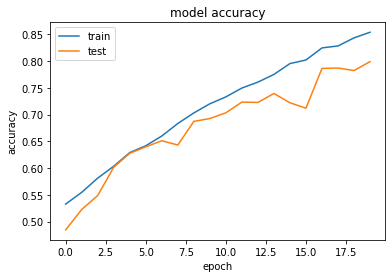

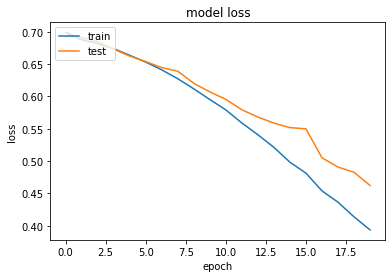

In [96]:
net.plot_taining_graphs(hist)

In [97]:
test_loss, test_acc = net.test(model,data.X_test, data.y_test)

print("Overall Accuracy:", test_acc)
print("Overall Loss:", test_loss)

1866/1866 [==============================] - 2s 944us/sample - loss: 0.6862 - acc: 0.5975
Overall Accuracy: 0.75753484
Overall Loss: 0.4262238354238284


In [89]:
y_pred = model.predict(data.X_test)

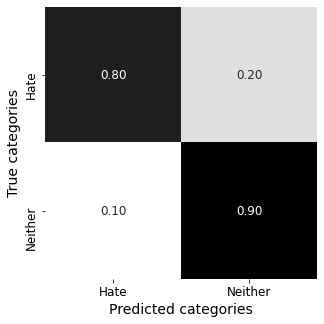

In [10]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(data.y_test, axis=1)
cls_obj = LR()
cls_obj.gen_confusion_matrix(y_test = y_test, y_pred = y_pred, classes = 2)

In [17]:
parameters['epochs']=len(hist.history['acc'])
parameters['test_acc']=test_acc
parameters['test_loss']=test_loss
parameters['timestamp']=tmp
df = pd.DataFrame([parameters])
df.to_csv('result.csv', mode='a', index=False, header=False)

## Hi-Code Mix

In [8]:
df_hi_cdmx = pd.read_csv('../data/dataset_hi_cdmx.csv')
df_hi_cdmx["class"] = df_hi_cdmx["class"].astype(int)
df_hi_cdmx = df_hi_cdmx.dropna() # drop any rotokenizer_testws with nans
df_hi_cdmx = df_hi_cdmx.drop(['text'],axis=1)
df_hi_cdmx = df_hi_cdmx.rename(columns={'basic_clean_text':'text'})
print(df_hi_cdmx.columns)
df_hi_cdmx.drop(df_hi_cdmx.loc[df_hi_cdmx['text_id'] == 'text_id'].index,inplace=True)
df_hi_cdmx.drop(df_hi_cdmx.loc[df_hi_cdmx['class'] == 'HS'].index,inplace=True)
df_hi_cdmx['text_len'] = df_hi_cdmx.apply(lambda x: len(x.text.split()), axis=1)
df_hi_cdmx = df_hi_cdmx[df_hi_cdmx['text_len']<200]

Index(['class', 'text_id', 'ekphrasis_clean_text', 'text'], dtype='object')


In [9]:
data = ProcessData(df_hi_cdmx, lang='en')

> /home/nv/project/online-hate-speech-recog/src/base_line_DNN.py(249)clean_doc()
-> feat = fg.features(lang=self.lang)
(Pdb) continue
Reading twitter - 1grams ...
Reading twitter - 2grams ...


  6%|▌         | 185/3161 [00:00<00:01, 1848.07it/s]

Reading twitter - 1grams ...


100%|██████████| 3161/3161 [00:01<00:00, 1886.42it/s]


In [6]:
data.max_seq_len, data.vocab_size, data.classes

(104, 6084, array([0, 1]))

In [7]:
parameters={'lang':'en',
       'seed':30,
       'epochs':50, 
       'batch_size':30, 
       'optimiser':'sgd', 
       'lr_rate':0.01, 
       'drop_out':0.2, 
       'hidden_size':64,
            'val_split':0.2
      }

In [10]:
net = network(param=parameters)
model = net.get_model_2(classes=len(data.classes),
                        vocabulary_size=data.vocab_size,
                        input_length=data.max_seq_len,
                        param=parameters)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 105)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 105, 100)     609100      input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 105, 100, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)      

In [16]:
tmp=get_timestamp()
model_path = '../model/'+tmp+'hi_cdmx_weights.best.hdf5'
hist = net.train(data.X_train, data.y_train, model, model_path, data.class_weight)

Train on 5971 samples, validate on 1493 samples
Epoch 1/50
5940/5971 [============================>.] - ETA: 0s - loss: 0.6347 - acc: 0.6249
Epoch 00001: val_acc improved from -inf to 0.56129, saving model to ../model/24-Aug-2020_00_23_00hi_cdmx_weights.best.hdf5
5971/5971 [==============================] - 8s 1ms/sample - loss: 0.6344 - acc: 0.6255 - val_loss: 0.6818 - val_acc: 0.5613
Epoch 2/50
5880/5971 [============================>.] - ETA: 0s - loss: 0.4902 - acc: 0.7556
Epoch 00002: val_acc did not improve from 0.56129
5971/5971 [==============================] - 3s 506us/sample - loss: 0.4887 - acc: 0.7568 - val_loss: 0.6608 - val_acc: 0.5211
Epoch 3/50
5910/5971 [============================>.] - ETA: 0s - loss: 0.4096 - acc: 0.8171
Epoch 00003: val_acc improved from 0.56129 to 0.84729, saving model to ../model/24-Aug-2020_00_23_00hi_cdmx_weights.best.hdf5
5971/5971 [==============================] - 3s 542us/sample - loss: 0.4105 - acc: 0.8168 - val_loss: 0.4351 - val_acc: 0.

KeyboardInterrupt: 

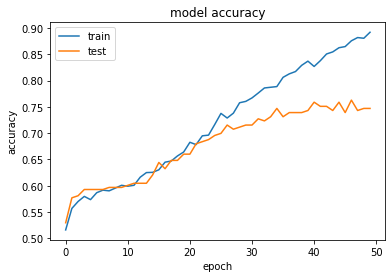

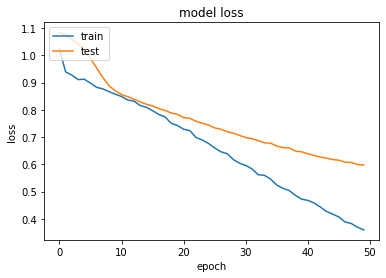

In [21]:
net.plot_taining_graphs(hist)

In [22]:
test_loss, test_acc = net.test(model,data.X_test, data.y_test)

print("Overall Accuracy:", test_acc)
print("Overall Loss:", test_loss)

633/633 [==============================] - 0s 220us/sample - loss: 1.0032 - acc: 0.5624
Overall Accuracy: 0.86240124
Overall Loss: 0.3031736399890123


In [23]:
y_pred = model.predict(data.X_test)

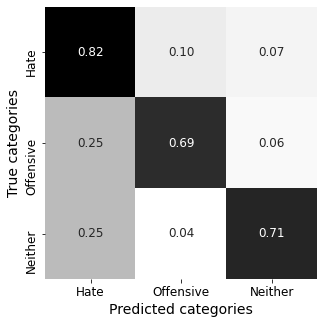

In [18]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(data.y_test, axis=1)
cls_obj = LR()
cls_obj.gen_confusion_matrix(y_test = y_test, y_pred = y_pred, classes = 3)

In [19]:
parameters['epochs']=len(hist.history['acc'])
parameters['test_acc']=test_acc
parameters['test_loss']=test_loss
parameters['timestamp']=tmp
df = pd.DataFrame([parameters])
df.to_csv('result.csv', mode='a', index=False)

## test Case

In [ ]:
text = ['@AvijitEmmi Bahenchod .... experienced lagte ho bhai bhot face with tears of joy']
test_data = ProcessData(df=text, lang='en', max_seq_len=48)


In [ ]:
net = network()
out = net.predict(model_path='../model/hi_cdmx_weights.best.hdf5',x=test_data.X)

In [ ]:
out[0][0]